### Questions
Clustering: Hierarchical <br>
Dataset : hitters.csv <br>
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques if necessary. <br>
Apply Hierarchical clustering algorithms (based on CRuns column) to find the group of players.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
df = pd.read_csv('hitters.csv')

In [4]:
# Checking for Null Values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
# Handling missing values
df = df.dropna()

In [6]:
# Extract the feature for clustering
X = df[['CRuns']]

In [7]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

In [8]:
# Apply Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['cluster'] = cluster.fit_predict(X_scaled)

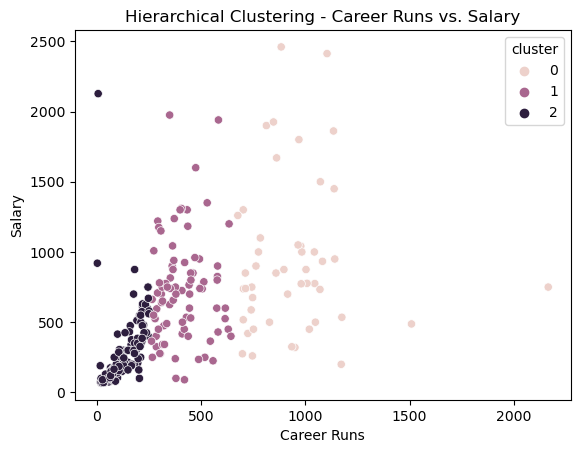

In [9]:
# Visualize the clusters
sns.scatterplot(x='CRuns', y='Salary', hue='cluster', data=df)
plt.title('Hierarchical Clustering - Career Runs vs. Salary')
plt.xlabel('Career Runs')
plt.ylabel('Salary')
plt.show()

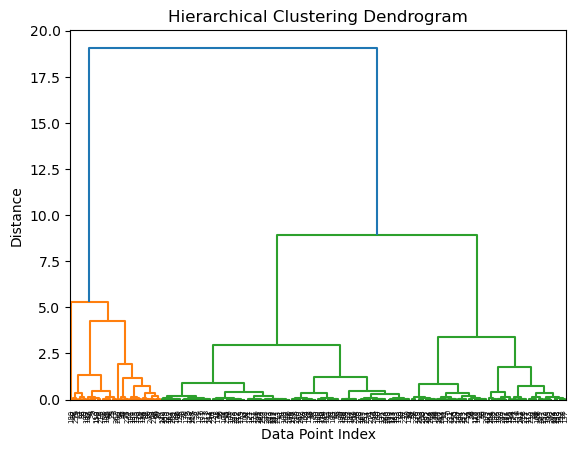

In [10]:
# Create and visualize the dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()